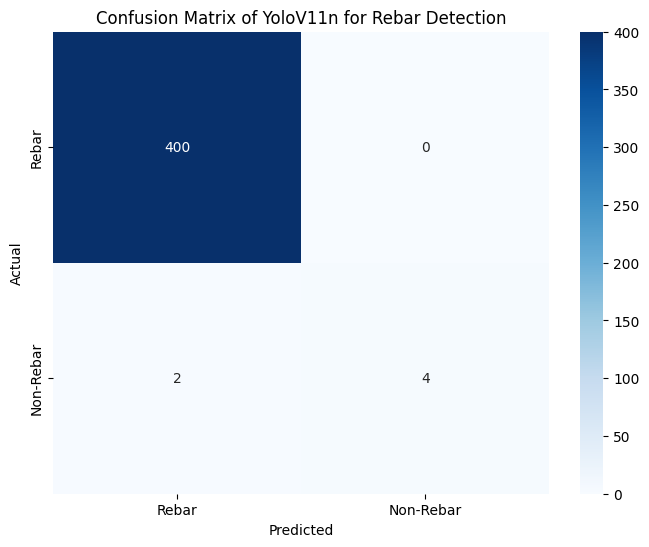

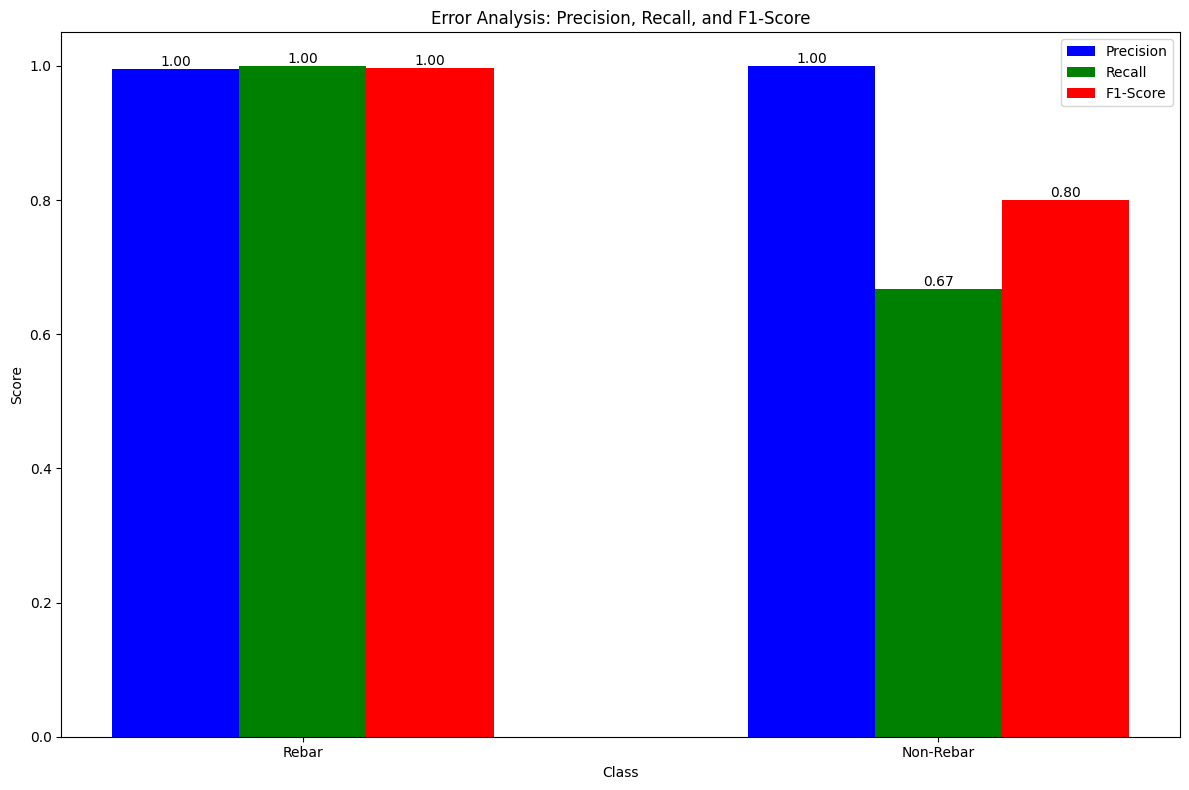

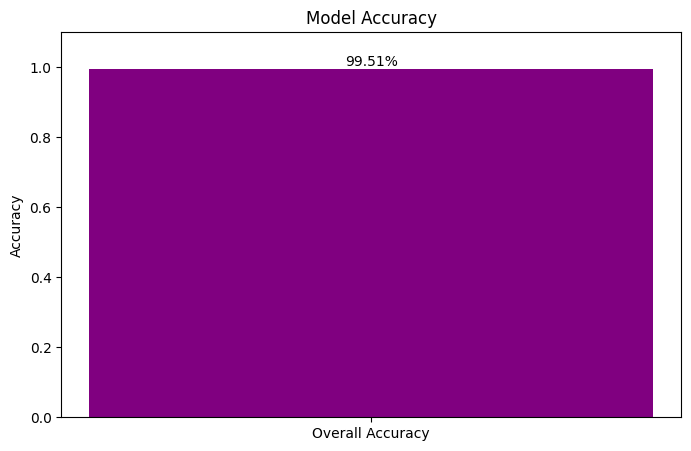


Error Analysis Report:
Class: ['Rebar', 'Non-Rebar']
Precision: [0.99502488 1.        ]
Recall: [1.         0.66666667]
F1-Score: [0.99750623 0.8       ]
Total Predictions: [402   4]
Correct Predictions: [400   4]
Misclassifications: [0 2]

Sklearn Classification Report:
              precision    recall  f1-score   support

       Rebar       1.00      1.00      1.00       402
   Non-Rebar       1.00      1.00      1.00         4

    accuracy                           1.00       406
   macro avg       1.00      1.00      1.00       406
weighted avg       1.00      1.00      1.00       406



In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix data (TN, FP, FN, TP)
confusion_data = np.array([
    [400, 0],  # True Negatives (Rebar) | False Positives
    [2, 4]     # False Negatives | True Positives (Non-Rebar)
])

# Labels for the confusion matrix
labels = ["Rebar", "Non-Rebar"]

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_data, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of YoloV11n for Rebar Detection")
plt.show()

# Compute metrics safely (avoid division by zero)
with np.errstate(divide='ignore', invalid='ignore'):
    precision = np.diag(confusion_data) / np.sum(confusion_data, axis=0)
    recall = np.diag(confusion_data) / np.sum(confusion_data, axis=1)
    f1_score = 2 * (precision * recall) / (precision + recall)

    # Set NaN values to 0 (in case of division by zero)
    precision = np.nan_to_num(precision)
    recall = np.nan_to_num(recall)
    f1_score = np.nan_to_num(f1_score)

# Overall Accuracy
accuracy = np.trace(confusion_data) / np.sum(confusion_data)

# Error analysis report
error_analysis_report = {
    "Class": labels,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1_score,
    "Total Predictions": np.sum(confusion_data, axis=0),
    "Correct Predictions": np.diag(confusion_data),
    "Misclassifications": np.sum(confusion_data, axis=1) - np.diag(confusion_data),
}

# Plot Precision, Recall, and F1-Score
bar_width = 0.2
x = np.arange(len(labels))

plt.figure(figsize=(12, 8))

metrics = {"Precision": precision, "Recall": recall, "F1-Score": f1_score}
colors = ['b', 'g', 'r']

for i, (metric, values) in enumerate(metrics.items()):
    bars = plt.bar(x + i * bar_width - bar_width, values, bar_width, label=metric, color=colors[i])
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom')

plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Error Analysis: Precision, Recall, and F1-Score')
plt.xticks(x, labels)
plt.legend()
plt.tight_layout()
plt.show()

# Plot Accuracy
plt.figure(figsize=(8, 5))
accuracy_bars = plt.bar(["Overall Accuracy"], [accuracy], color='purple')
for bar in accuracy_bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2%}', ha='center', va='bottom')

plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.ylim(0, 1.1)
plt.show()

# Print Error Analysis Report
print("\nError Analysis Report:")
for key, value in error_analysis_report.items():
    print(f"{key}: {value}")

# Print Classification Report (Sklearn)
y_true = [0] * 400 + [0] * 2 + [1] * 4  # Actual labels
y_pred = [0] * 400 + [1] * 0 + [0] * 2 + [1] * 4  # Predicted labels

print("\nSklearn Classification Report:")
print(classification_report(y_true, y_pred, target_names=labels))
